#Mining the Social Web, 2nd Edition

##Chapter 2: Mining Facebook: Analyzing Fan Pages, Examining Friendships, and More

This IPython Notebook provides an interactive way to follow along with and explore the numbered examples from [_Mining the Social Web (2nd Edition)_](http://bit.ly/135dHfs). The intent behind this notebook is to reinforce the concepts from the sample code in a fun, convenient, and effective way. This notebook assumes that you are reading along with the book and have the context of the discussion as you work through these exercises.

In the somewhat unlikely event that you've somehow stumbled across this notebook outside of its context on GitHub, [you can find the full source code repository here](http://bit.ly/16kGNyb).

## Copyright and Licensing

You are free to use or adapt this notebook for any purpose you'd like. However, please respect the [Simplified BSD License](https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/blob/master/LICENSE.txt) that governs its use.

# Facebook API Access

Facebook implements OAuth 2.0 as its standard authentication mechanism, but provides a convenient way for you to get an _access token_ for development purposes, and we'll opt to take advantage of that convenience in this notebook. For details on implementing an OAuth flow with Facebook (all from within IPython Notebook), see the \_AppendixB notebook from the [IPython Notebook Dashboard](/).

For this first example, login to your Facebook account and go to https://developers.facebook.com/tools/explorer/ to obtain and set permissions for an access token that you will need to define in the code cell defining the ACCESS_TOKEN variable below.  

Be sure to explore the permissions that are available by clicking on the "Get Access Token" button that's on the page and exploring all of the tabs available. For example, you will need to set the "friends_likes" option under the "Friends Data Permissions" since this permission is used by the script below but is not a basic permission and is not enabled by default. 

<img src="files/resources/ch02-facebook/images/FB_GraphExplorer_perms.png" width="300px" /><br />

In [66]:
# Copy and paste in the value you just got from the inline frame into this variable and execute this cell.
# Keep in mind that you could have just gone to https://developers.facebook.com/tools/access_token/
# and retrieved the "User Token" value from the Access Token Tool

ACCESS_TOKEN = 'EAACEdEose0cBANwg3LZCqoHa3MRHeDZBm5tDWJ4zTjXZAnMlJRgtgRiZCY2HwFWwEfHEc7J5To6vgu8NXupZA7gdKEl1yScWTVKU2I9mgTSTVT1g3vf4BPP6HWOZAEtSDGbWXnJRx9fIsQmpAgG4ccHvx9wyNAqN7IP7V5c5PSqT09VhZBWzZBrQAKWMNNrE6kMk5298LM4wWgZDZD'

## Example 1. Making Graph API requests over HTTP

In [67]:
import requests # pip install requests
import json

base_url = 'https://graph.facebook.com/me'

# Get 10 likes for 10 friends
fields = 'id,name,likes,friends.limit(10).fields(likes.limit(10))'

url = '%s?fields=%s&access_token=%s' % \
    (base_url, fields, ACCESS_TOKEN,)

# This API is HTTP-based and could be requested in the browser,
# with a command line utlity like curl, or using just about
# any programming language by making a request to the URL.
# Click the hyperlink that appears in your notebook output
# when you execute this code cell to see for yourself...
print (url)

# Interpret the response as JSON and convert back
# to Python data structures
content = requests.get(url).json()

# Pretty-print the JSON and display it
print (json.dumps(content, indent=1))

https://graph.facebook.com/me?fields=id,name,likes,friends.limit(10).fields(likes.limit(10))&access_token=EAACEdEose0cBANwg3LZCqoHa3MRHeDZBm5tDWJ4zTjXZAnMlJRgtgRiZCY2HwFWwEfHEc7J5To6vgu8NXupZA7gdKEl1yScWTVKU2I9mgTSTVT1g3vf4BPP6HWOZAEtSDGbWXnJRx9fIsQmpAgG4ccHvx9wyNAqN7IP7V5c5PSqT09VhZBWzZBrQAKWMNNrE6kMk5298LM4wWgZDZD
{
 "id": "780638151978579",
 "name": "Swapnil Gaikwad",
 "likes": {
  "data": [
   {
    "name": "Database Research & Development : dbrnd.com",
    "id": "1618800378400774",
    "created_time": "2017-11-22T04:41:23+0000"
   },
   {
    "name": "Oracle SQL Tips, Tricks and Hacks",
    "id": "378208015722778",
    "created_time": "2017-11-22T04:41:19+0000"
   },
   {
    "name": "IIM Bangalore Executive Education Programmes  ( IIMB  EEP )",
    "id": "156110104431789",
    "created_time": "2017-11-21T19:14:08+0000"
   },
   {
    "name": "Obama Foundation",
    "id": "567101470157212",
    "created_time": "2017-11-21T18:28:14+0000"
   },
   {
    "name": "Shiny Doshi",
    "i

Note: If you attempt to run a query for all of your friends' likes and it appears to hang, it is probably because you have a lot of friends who have a lot of likes. If this happens, you may need to add limits and offsets to the fields in the query as described in Facebook's [field expansion](https://developers.facebook.com/docs/reference/api/field_expansion/) documentation. However, the <code>facebook</code> library that we'll use in the next example handles some of these issues, so it's recommended that you hold off and try it out first. This initial example is just to illustrate that Facebook's API is built on top of HTTP.

A couple of field limit/offset examples that illustrate the possibilities follow:

<code>
fields = 'id,name,friends.limit(10).fields(likes)'            # Get all likes for 10 friends 
fields = 'id,name,friends.offset(10).limit(10).fields(likes)' # Get all likes for 10 more friends 
fields = 'id,name,friends.fields(likes.limit(10))'            # Get 10 likes for all friends 
fields = 'id,name,friends.fields(likes.limit(10))'            # Get 10 likes for all friends
</code>

## Example 2. Querying the Graph API with Python

In [68]:
import facebook # pip install facebook-sdk
import json

# A helper function to pretty-print Python objects as JSON

def pp(o): 
    print (json.dumps(o, indent=1))

# Create a connection to the Graph API with your access token

g = facebook.GraphAPI(ACCESS_TOKEN)

# Execute a few sample queries

print ('---------------')
print ('Me')
print ('---------------')
pp(g.get_object('me'))
print
print ('---------------')
print ('My Friends')
print ('---------------')
pp(g.get_connections('me', 'friends'))
print
print ('---------------')
print ('Social Web')
print ('---------------')
pp(g.request("search", {'q' : 'social web', 'type' : 'page'}))

---------------
Me
---------------
{
 "name": "Swapnil Gaikwad",
 "id": "780638151978579"
}
---------------
My Friends
---------------
{
 "data": [
  {
   "name": "Happy Mittal",
   "id": "10201015942839062"
  },
  {
   "name": "Sayali Joshi",
   "id": "100000370128557"
  },
  {
   "name": "Ashish Kawade",
   "id": "100000790473777"
  },
  {
   "name": "Ganesh Patil",
   "id": "890028124371639"
  },
  {
   "name": "Lokesh Walase",
   "id": "776422599095743"
  }
 ],
 "paging": {
  "cursors": {
   "before": "QVFIUkI1eElhcXhlb0F3S0VjSTdnYWMxSVhLbWpDaTZAGODU0NHRtWFBiRTVOZAXN4d0JqejBDSUZAGNkpyOEp0Njh1elgZD",
   "after": "QVFIUmhfMzJOcEpYdlhOTm9vRDlHU21ySXJhbnVJdGkwSFcxQ1VZAMjFqbHZAURzdwVzBrU2FrUlUxck5ZAVWN6eC1vc2ExMnFaSXNQYVBPa0k2NWo3bHdBeTlR"
  }
 },
 "summary": {
  "total_count": 482
 }
}
---------------
Social Web
---------------
{
 "data": [
  {
   "name": "WEB Social Agency",
   "id": "501464483358126"
  },
  {
   "name": "Social Webs",
   "id": "1023935801085511"
  },
  {
   "name": "

## Example 3. Results for a Graph API query for Mining the Social Web

In [69]:
# Get an instance of Mining the Social Web
# Using the page name also works if you know it.
# e.g. 'MiningTheSocialWeb' or 'CrossFit'
mtsw_id = '146803958708175'
pp(g.get_object(mtsw_id))

{
 "name": "Mining the Social Web",
 "id": "146803958708175"
}


## Example 4. Querying the Graph API for Open Graph objects by their URLs

In [70]:
# MTSW catalog link
pp(g.get_object('http://shop.oreilly.com/product/0636920030195.do'))

# PCI catalog link
pp(g.get_object('http://shop.oreilly.com/product/9780596529321.do'))

{
 "share": {
  "comment_count": 0,
  "share_count": 290
 },
 "og_object": {
  "id": "465351090213998",
  "description": "Facebook, Twitter, LinkedIn, Google+, and other social web properties generate a wealth of valuable social data, but how can you tap into this data and discover who\u2019s connecting with whom, which insights are lurking just beneath the surface,...",
  "title": "Mining the Social Web",
  "type": "book",
  "updated_time": "2017-10-14T21:53:30+0000"
 },
 "id": "http://shop.oreilly.com/product/0636920030195.do"
}
{
 "share": {
  "comment_count": 0,
  "share_count": 204
 },
 "og_object": {
  "id": "10150339462353143",
  "description": "This fascinating book demonstrates how you can build web applications to mine the enormous amount of data created by people on the Internet. With the sophisticated algorithms in this book, you can write smart programs to access interesting datasets...",
  "title": "Programming Collective Intelligence",
  "type": "book",
  "updated_time":

## Example 5. Comparing likes between Coke and Pepsi fan pages

In [78]:
# Find Pepsi and Coke in search results

#pp(g.request('search', {'q' : 'pepsi', 'type' : 'page', 'limit' : 5}))
#pp(g.request('search', {'q' : 'coke', 'type' : 'page', 'limit' : 5}))

# Use the ids to query for likes

pepsi_id = '56381779049' # Could also use 'PepsiUS'
coke_id = '40796308305'  # Could also use 'CocaCola'

# A quick way to format integers with commas every 3 digits
def int_format(n): return "{:,}".format(n)

print(g.get_object(pepsi_id))
print ("Pepsi likes:", int_format(g.get_object(pepsi_id)['likes']))
#print ("Coke likes:", int_format(g.get_object(coke_id)['likes']))

{'name': 'Pepsi', 'id': '56381779049'}


KeyError: 'likes'

In [95]:
import seolib as seo
 
likes = seo.get_facebook_likes('http://www.meccanismocomplesso.org')
print (likes)  # for Python 2.7  ,on Python 3.x use print(likes)

ImportError: cannot import name 'get_seomoz_data'

In [83]:
import facebook    #sudo pip install facebook-sdk
from collections import Counter
import itertools
# the access token should be stored as a string
access_token = "EAACEdEose0cBANwg3LZCqoHa3MRHeDZBm5tDWJ4zTjXZAnMlJRgtgRiZCY2HwFWwEfHEc7J5To6vgu8NXupZA7gdKEl1yScWTVKU2I9mgTSTVT1g3vf4BPP6HWOZAEtSDGbWXnJRx9fIsQmpAgG4ccHvx9wyNAqN7IP7V5c5PSqT09VhZBWzZBrQAKWMNNrE6kMk5298LM4wWgZDZD"
 
g = facebook.GraphAPI(access_token) #creating connection to the Facebook Graph API through facebook-sdk
 
 
friends = g.get_connections("me", "friends")['data'] #getting the name and id of friends 
 
likes = { friend['name'] : g.get_connections(friend['id'], "likes")['data'] for friend in friends } #a dictionary comprehension to store
#frined's name as key and liked page information as it's value
 
friends_likes = Counter([like['name'] for friend in likes for like in likes[friend] if like.get('name')]) #counting the repetition of pages
#and getting name of the page
 
friends_likes_id = Counter ([like['id'] for friend in likes for like in likes[friend] if like.get('id')]) #getting id for the pages with
#repetitions
 
for i in friends_likes.most_common(10):    #getting the 10 most repeated pages amongst friends, returns a tupple with page name and no. of likes
        print (i[0],i[1])
 
for i,j in zip(friends_likes.most_common(10),friends_likes_id.most_common(10)): #using itertools to iterate through two items and printing the page name with the global likes
       print (i[0],g.get_object(j[0]))#['likes'])

Terribly Dank Tales 1
Dank IIT Delhi Memes 1
Laxmikant-Pyarelal 1
Runners Club, IITD 1
Cricket on Facebook 1
Timbl 1
삼성전자 뉴스룸 1
Golmaal Again 1
Your Food Lab 1
Yum 1
Terribly Dank Tales {'name': 'Terribly Dank Tales', 'id': '149129769003176'}
Dank IIT Delhi Memes {'name': 'Dank IIT Delhi Memes', 'id': '181412655693658'}
Laxmikant-Pyarelal {'name': 'Laxmikant-Pyarelal', 'id': '401275206940604'}
Runners Club, IITD {'name': 'Runners Club, IITD', 'id': '678935365586565'}
Cricket on Facebook {'name': 'Cricket on Facebook', 'id': '727565050588014'}
Timbl {'name': 'Timbl', 'id': '1740827109490784'}
삼성전자 뉴스룸 {'name': '삼성전자 뉴스룸', 'id': '314882591487'}
Golmaal Again {'name': 'Golmaal Again', 'id': '1459108890784912'}
Your Food Lab {'name': 'Your Food Lab', 'id': '1443948855922449'}
Yum {'name': 'Yum', 'id': '1729612963992795'}


In [77]:

pepsi_id = '56381779049' # Could also use 'PepsiUS'
coke_id = '40796308305'  # Could also use 'CocaCola'

# A quick way to format integers with commas every 3 digits
def int_format(n): return "{:,}".format(n)


base_url = 'https://graph.facebook.com/'
# Get 10 likes for 10 friends
fields = 'fan_count'

#40796308305?fields=fan_count

url = '%s56381779049?fields=%s&access_token=%s' % \
    (base_url, fields, ACCESS_TOKEN,)

# This API is HTTP-based and could be requested in the browser,
# with a command line utlity like curl, or using just about
# any programming language by making a request to the URL.
# Click the hyperlink that appears in your notebook output
# when you execute this code cell to see for yourself...
print (url)

# Interpret the response as JSON and convert back
# to Python data structures
pepsi = requests.get(url).json()

# Pretty-print the JSON and display it
print (json.dumps(pepsi, indent=1))



url = '%s40796308305?fields=%s&access_token=%s' % \
    (base_url, fields, ACCESS_TOKEN,)

print (url)

# Interpret the response as JSON and convert back
# to Python data structures
coke = requests.get(url).json()

# Pretty-print the JSON and display it
print (json.dumps(coke, indent=1))



https://graph.facebook.com/56381779049?fields=fan_count&access_token=EAACEdEose0cBANwg3LZCqoHa3MRHeDZBm5tDWJ4zTjXZAnMlJRgtgRiZCY2HwFWwEfHEc7J5To6vgu8NXupZA7gdKEl1yScWTVKU2I9mgTSTVT1g3vf4BPP6HWOZAEtSDGbWXnJRx9fIsQmpAgG4ccHvx9wyNAqN7IP7V5c5PSqT09VhZBWzZBrQAKWMNNrE6kMk5298LM4wWgZDZD
{
 "error": {
  "message": "(#12) fan_count field requires version v2.6 or higher",
  "type": "OAuthException",
  "code": 12,
  "fbtrace_id": "HA8kmBMMiAl"
 }
}
https://graph.facebook.com/coke_id?fields=fan_count&access_token=EAACEdEose0cBANwg3LZCqoHa3MRHeDZBm5tDWJ4zTjXZAnMlJRgtgRiZCY2HwFWwEfHEc7J5To6vgu8NXupZA7gdKEl1yScWTVKU2I9mgTSTVT1g3vf4BPP6HWOZAEtSDGbWXnJRx9fIsQmpAgG4ccHvx9wyNAqN7IP7V5c5PSqT09VhZBWzZBrQAKWMNNrE6kMk5298LM4wWgZDZD
{
 "error": {
  "message": "(#803) Some of the aliases you requested do not exist: coke_id",
  "type": "OAuthException",
  "code": 803,
  "fbtrace_id": "DzMQ7lrANRC"
 }
}


## Example 6. Querying a page for its "feed" and "links" connections

In [85]:
pp(g.get_connections(pepsi_id, 'feed'))
#pp(g.get_connections(pepsi_id, 'links'))

pp(g.get_connections(coke_id, 'feed'))
#pp(g.get_connections(coke_id, 'links'))

{
 "data": [
  {
   "message": "Get ready to get hungry\u2014we're talking Thanksgiving sides in The Fun Doesn't End Zone.",
   "created_time": "2017-11-21T17:30:00+0000",
   "id": "56381779049_10211311357525844"
  },
  {
   "message": "MAX wrote Lights Down Low for a very special lady, but it sure feels like it\u2019s for all of us. Check out our time with this inspired artist on #TheSoundDrop pep.si/max",
   "created_time": "2017-11-20T18:31:04+0000",
   "id": "56381779049_10156147326639050"
  },
  {
   "message": "TFW you clean the last #Friendsgiving dish in time to watch #SNF",
   "created_time": "2017-11-20T00:30:01+0000",
   "id": "56381779049_10211324133565237"
  },
  {
   "message": "New TD rules mean new ways for Dak Prescott to celebrate. We're helping him with a few ideas.",
   "created_time": "2017-11-18T20:00:01+0000",
   "id": "56381779049_10156138110004050"
  },
  {
   "message": "In our book, Fridays always call for pizza.",
   "created_time": "2017-11-17T18:30:06+0000

## Example 7. Querying for all of your friends' likes

In [13]:
# First, let's query for all of the likes in your social
# network and store them in a slightly more convenient
# data structure as a dictionary keyed on each friend's
# name. We'll use a dictionary comprehension to iterate
# over the friends and build up the likes in an intuitive
# way, although the new "field expansion" feature could 
# technically do the job in one fell swoop as follows:
#
# g.get_object('me', fields='id,name,friends.fields(id,name,likes)')
#
# See Appendix C for more information on Python tips such as
# dictionary comprehensions

friends = g.get_connections("me", "friends")['data']

likes = { friend['name'] : g.get_connections(friend['id'], "likes")['data'] 
          for friend in friends }

print (likes)

{'Happy Mittal': [{'name': 'Terribly Dank Tales', 'id': '149129769003176', 'created_time': '2017-08-14T21:37:32+0000'}, {'name': 'Dank IIT Delhi Memes', 'id': '181412655693658', 'created_time': '2017-07-27T18:50:36+0000'}, {'name': 'Laxmikant-Pyarelal', 'id': '401275206940604', 'created_time': '2017-07-26T18:59:11+0000'}, {'name': 'Runners Club, IITD', 'id': '678935365586565', 'created_time': '2017-07-13T09:20:30+0000'}, {'name': 'Cricket on Facebook', 'id': '727565050588014', 'created_time': '2017-06-11T01:19:09+0000'}, {'name': 'Timbl', 'id': '1740827109490784', 'created_time': '2017-04-19T17:21:02+0000'}, {'name': '삼성전자 뉴스룸', 'id': '314882591487', 'created_time': '2017-03-21T00:53:59+0000'}, {'name': 'Golmaal Again', 'id': '1459108890784912', 'created_time': '2017-03-20T16:20:23+0000'}, {'name': 'Your Food Lab', 'id': '1443948855922449', 'created_time': '2017-02-20T07:50:27+0000'}, {'name': 'Yum', 'id': '1729612963992795', 'created_time': '2017-02-18T18:19:34+0000'}, {'name': 'ChefC

## Example 8. Calculating the most popular likes among your friends

In [14]:
# Analyze all likes from friendships for frequency

# pip install prettytable
from prettytable import PrettyTable
from collections import Counter
friends_likes = Counter([like['name']
                         for friend in likes 
                           for like in likes[friend]
                               if like.get('name')])

pt = PrettyTable(field_names=['Name', 'Freq'])
pt.align['Name'], pt.align['Freq'] = 'l', 'r'
[ pt.add_row(fl) for fl in friends_likes.most_common(10) ]

print ('Top 10 likes amongst friends')
print (pt)

Top 10 likes amongst friends
+----------------------+------+
| Name                 | Freq |
+----------------------+------+
| Terribly Dank Tales  |    1 |
| Dank IIT Delhi Memes |    1 |
| Laxmikant-Pyarelal   |    1 |
| Runners Club, IITD   |    1 |
| Cricket on Facebook  |    1 |
| Timbl                |    1 |
| 삼성전자 뉴스룸      |    1 |
| Golmaal Again        |    1 |
| Your Food Lab        |    1 |
| Yum                  |    1 |
+----------------------+------+


## Example 9. Calculating the most popular categories for likes among your friends

In [15]:
# Analyze all like categories by frequency
# categories not available now

friends_likes_categories = Counter([like['category'] 
                                    for friend in likes 
                                      for like in likes[friend]])

pt = PrettyTable(field_names=['Category', 'Freq'])
pt.align['Category'], pt.align['Freq'] = 'l', 'r'
[ pt.add_row(flc) for flc in friends_likes_categories.most_common(10) ]

print ("Top 10 like categories for friends")
print (pt)

KeyError: 'category'

## Example 10. Calculating the number of likes for each friend and sorting by frequency

In [16]:
# Build a frequency distribution of number of likes by 
# friend with a dictionary comprehension and sort it in 
# descending order

from operator import itemgetter

num_likes_by_friend = { friend : len(likes[friend]) 
                        for friend in likes }


pt = PrettyTable(field_names=['Friend', 'Num Likes'])
pt.align['Friend'], pt.align['Num Likes'] = 'l', 'r'
[ pt.add_row(nlbf) 
  for nlbf in sorted(num_likes_by_friend.items(), 
                     key=itemgetter(1), 
                     reverse=True) ]

print ("Number of likes per friend")
print (pt)

Number of likes per friend
+---------------+-----------+
| Friend        | Num Likes |
+---------------+-----------+
| Happy Mittal  |        25 |
| Sayali Joshi  |        25 |
| Lokesh Walase |        25 |
| Ashish Kawade |         0 |
| Ganesh Patil  |         0 |
+---------------+-----------+


## Example 11. Finding common likes between an ego and its friendships in a social network

In [17]:
# Which of your likes are in common with which friends?
my_likes = [ like['name'] 
             for like in g.get_connections("me", "likes")['data'] ]

pt = PrettyTable(field_names=["Name"])
pt.align = 'l'
[ pt.add_row((ml,)) for ml in my_likes ]
print ("My likes")
print (pt)

# Use the set intersection as represented by the ampersand
# operator to find common likes.

common_likes = list(set(my_likes) & set(friends_likes))

pt = PrettyTable(field_names=["Name"])
pt.align = 'l'
[ pt.add_row((cl,)) for cl in common_likes ]
print
print ("My common likes with friends")
print (pt)

My likes
+-------------------------------------------------------------+
| Name                                                        |
+-------------------------------------------------------------+
| Database Research & Development : dbrnd.com                 |
| Oracle SQL Tips, Tricks and Hacks                           |
| IIM Bangalore Executive Education Programmes  ( IIMB  EEP ) |
| Obama Foundation                                            |
| Shiny Doshi                                                 |
| ISB Executive Education                                     |
| Edifyself                                                   |
| Hindi Dubbed Movies                                         |
| BigCommerce                                                 |
| Swiggy                                                      |
| The Logical Story                                           |
| BITS Pilani Work Integrated Learning Programmes             |
| Divanshi Rana                

## Example 12. Calculating the friends most similar to an ego in a social network

My similar friends (ranked)
+--------+--------------+
| Friend | Common Likes |
+--------+--------------+
+--------+--------------+


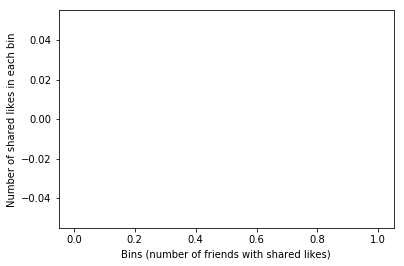

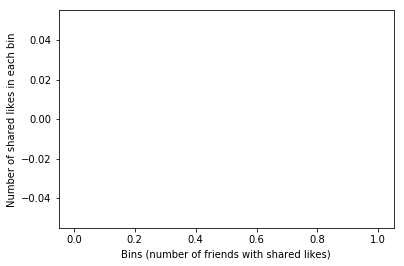

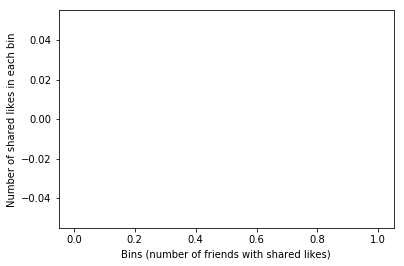

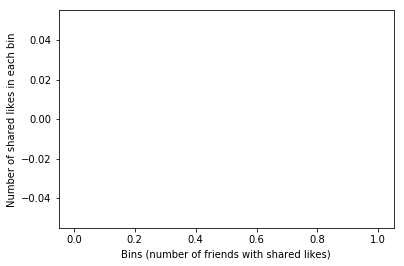

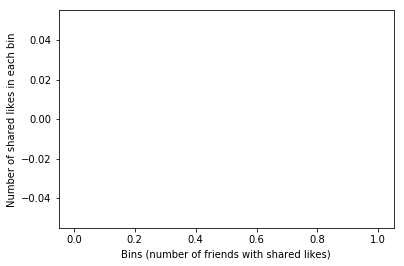

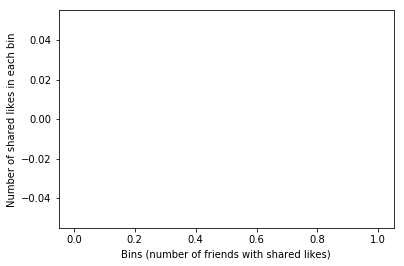

In [91]:
# Which of your friends like things that you like?

similar_friends = [ (friend, friend_like['name']) 
                     for friend, friend_likes in likes.items()
                       for friend_like in friend_likes
                         if friend_like.get('name') in common_likes ]


# Filter out any possible duplicates that could occur

ranked_friends = Counter([ friend for (friend, like) in list(set(similar_friends)) ])


pt = PrettyTable(field_names=["Friend", "Common Likes"])
pt.align["Friend"], pt.align["Common Likes"] = 'l', 'r'
[ pt.add_row(rf) 
  for rf in sorted(ranked_friends.items(), 
                   key=itemgetter(1), 
                   reverse=True) ]
print ("My similar friends (ranked)")
print (pt)

# Also keep in mind that you have the full range of plotting
# capabilities available to you. A quick histogram that shows
# how many friends.]
from matplotlib import pyplot as plt

plt.hist(ranked_friends.values())
plt.xlabel('Bins (number of friends with shared likes)')
plt.ylabel('Number of shared likes in each bin')

# Keep in mind that you can customize the binning
# as desired. See http://matplotlib.org/api/pyplot_api.html

# For example...

plt.figure() # Display the previous plot
plt.hist(ranked_friends.values())#,bins=arange(1,max(ranked_friends.values()),1))
plt.xlabel('Bins (number of friends with shared likes)')
plt.ylabel('Number of shared likes in each bin')
plt.figure() # Display the working plot
#plt.show()

## Example 13. Constructing a graph of mutual friendships

In [92]:
import networkx as nx # pip install networkx
import requests # pip install requests

friends = [ (friend['id'], friend['name'],)
                for friend in g.get_connections('me', 'friends')['data'] ]

url = 'https://graph.facebook.com/me/mutualfriends/%s?access_token=%s'

mutual_friends = {} 

# This loop spawns a separate request for each iteration, so
# it may take a while. Optimization with a thread pool or similar
# technique would be possible.
for friend_id, friend_name in friends:
    r = requests.get(url % (friend_id, ACCESS_TOKEN,) )
    response_data = json.loads(r.content)['data']
    mutual_friends[friend_name] = [ data['name'] 
                                    for data in response_data ]
    
nxg = nx.Graph()

[ nxg.add_edge('me', mf) for mf in mutual_friends ]

[ nxg.add_edge(f1, f2) 
  for f1 in mutual_friends 
      for f2 in mutual_friends[f1] ]

# Explore what's possible to do with the graph by 
# typing nxg.<tab> or executing a new cell with 
# the following value in it to see some pydoc on nxg
print (nxg)

KeyError: 'data'

## Example 14. Finding and analyzing cliques in a graph of mutual friendships

In [20]:
# Finding cliques is a hard problem, so this could
# take a while for large graphs.
# See http://en.wikipedia.org/wiki/NP-complete and 
# http://en.wikipedia.org/wiki/Clique_problem.

cliques = [c for c in nx.find_cliques(nxg)]

num_cliques = len(cliques)

clique_sizes = [len(c) for c in cliques]
max_clique_size = max(clique_sizes)
avg_clique_size = sum(clique_sizes) / num_cliques

max_cliques = [c for c in cliques if len(c) == max_clique_size]

num_max_cliques = len(max_cliques)

max_clique_sets = [set(c) for c in max_cliques]
friends_in_all_max_cliques = list(reduce(lambda x, y: x.intersection(y),
                                  max_clique_sets))

print ('Num cliques:', num_cliques)
print ('Avg clique size:', avg_clique_size)
print ('Max clique size:', max_clique_size)
print ('Num max cliques:', num_max_cliques)
print
print ('Friends in all max cliques:')
print (json.dumps(friends_in_all_max_cliques, indent=1))
print
print ('Max cliques:')
print (json.dumps(max_cliques, indent=1))

NameError: name 'nxg' is not defined

## Example 15. Serializing a NetworkX graph to a file for consumption by D3

In [ ]:
from networkx.readwrite import json_graph

nld = json_graph.node_link_data(nxg)

json.dump(nld, open('resources/ch02-facebook/viz/force.json','w'))

Note: You may need to implement some filtering on the NetworkX graph before writing it out to a file for display in D3, and for more than dozens of nodes, it may not be reasonable to render a meaningful visualization without some JavaScript hacking on its parameters. View the JavaScript source in [force.html](files/resources/ch02-facebook/viz/force.html) for some of the details.

## Example 16. Visualizing a mutual friendship graph with D3

In [ ]:
from IPython.display import IFrame
from IPython.core.display import display

# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.

viz_file = 'files/resources/ch02-facebook/viz/force.html'

display(IFrame(viz_file, '100%', '600px'))